In [1]:
import requests
from bs4 import BeautifulSoup
import csv
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Function to scrape website content
def scrape_website(url):
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"Failed to fetch the URL: {url}")
    
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Extracting all text content from the page
    text_content = soup.get_text(separator=' ', strip=True)
    
    return text_content

# def extract_tags(url):
#     try:
#         # Fetch the content of the URL
#         response = requests.get(url)
#         response.raise_for_status()  # Raise an error for bad responses
        
#         # Parse the HTML content with BeautifulSoup
#         soup = BeautifulSoup(response.content, 'html.parser')
        
#         # Assuming tags are inside <a> elements with a specific class, e.g., "tag" (change as per website)
# #         tags = [tag.text.strip() for tag in soup.find_all('a', class_='tag')]
        
#         # If tags are inside meta tags, you could do something like this:
#         tags = [tag['content'] for tag in soup.find_all('meta', attrs={'name': 'keywords'})]
        
#         return tags

#     except requests.exceptions.RequestException as e:
#         print(f"An error occurred: {e}")
#         return []


# Function to analyze and summarize text
def analyze_text(text):
    # Tokenize the text into sentences and words
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    
    # Convert words to lowercase and filter out stop words and punctuation
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    
    # Count word frequencies
    word_freq = Counter(words)
    
    # Get the most common words
    most_common_words = word_freq.most_common(10)
    
    # Create a summary (simple approach: first 5 sentences)
    summary = ' '.join(sentences[:5])
    
    return {
        'total_sentences': len(sentences),
        'total_words': len(words),
        'most_common_words': most_common_words,
        'summary': summary
    }


# Main function
def main():
    url = input("Enter the URL of the website to scrape: ")
    try:
        text_content = scrape_website(url)
        analysis_result = analyze_text(text_content)
        
        print("Text Analysis Summary:")
        print(f"Total Sentences: {analysis_result['total_sentences']}")
        print(f"Total Words: {analysis_result['total_words']}")
        print("Most Common Words:")
        for word, freq in analysis_result['most_common_words']:
            print(f"  {word}: {freq}")
        
#         print("\nSummary:")
#         print(analysis_result['summary'])
        
#         # Extract and print tags
#         tags = extract_tags(url)
#         print("Extracted Tags:", tags)
        
    except Exception as e:
        print(e)

if __name__ == "__main__":
    main()



Enter the URL of the website to scrape: https://www.kdnuggets.com/the-role-of-ai-in-digital-marketing
Text Analysis Summary:
Total Sentences: 88
Total Words: 1395
Most Common Words:
  ai: 72
  marketing: 39
  data: 34
  digital: 30
  science: 17
  customer: 11
  free: 11
  strategies: 10
  tools: 10
  role: 9


## Read a list of url, text mining from each url and Save the result to a .csv file

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import csv
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import os
import re

# Function to scrape website content
def scrape_website(url):
    try:
        response = requests.get(url, timeout=10)  # Timeout set to avoid long wait times
        response.raise_for_status()  # Raise an exception for bad HTTP responses
    except requests.exceptions.RequestException as e:
        print(f"Error fetching {url}: {e}")
        return None

    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Extracting all text content from the page
    text_content = soup.get_text(separator=' ', strip=True)
    
    return text_content


# Function to analyze and summarize text
def analyze_text(text):
    # Tokenize the text into sentences and words
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    
    # Convert words to lowercase and filter out stop words and punctuation
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    
    # Count word frequencies
    word_freq = Counter(words)
    
    # Get the most common words
    most_common_words = word_freq.most_common(10)
    
    # Create a summary (simple approach: first 5 sentences)
#     summary = ' '.join(sentences[:5])
    
    return {
        'total_sentences': len(sentences),
        'total_words': len(words),
        'most_common_words': most_common_words#,
#         'summary': summary
    }


# Function to read URLs from CSV file
def read_urls_from_csv(csv_file_path):
    urls = []
    with open(csv_file_path, mode='r') as file:
        reader = csv.reader(file)
        for row in reader:
            if row:  # Ensure the row is not empty
                urls.append(row[0])  # Assuming URLs are in the first column
    return urls


# Function to save analysis results to a CSV file
def save_analysis_to_csv(output_file, results):
    # Check if file exists to write headers once
    file_exists = os.path.isfile(output_file)
    
    with open(output_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        
        # Write the header only if the file doesn't exist
        if not file_exists:
            writer.writerow(['Text Analysis Summary'])  # General header for the file

        # Write each result to the file in the desired format
        for result in results:
            writer.writerow([f"URL: {result['url']}"])
            writer.writerow([f"Total Sentences: {result['total_sentences']}"])
            writer.writerow([f"Total Words: {result['total_words']}"])
            writer.writerow(["Most Common Words:"])
            for word, freq in result['most_common_words']:
                writer.writerow([f"  {word}: {freq}"])
#             writer.writerow([f"Summary: {result['summary']}"])
            writer.writerow([])  # Blank row for spacing between records


# Main function to process URLs from a CSV and save results
def main():
    input_csv = "Articles.csv" #input("Enter the input CSV file path (with URLs): ")
    output_csv = "Output.csv" #input("Enter the output CSV file path: ")
    
    urls = read_urls_from_csv(input_csv)
    results = []

    for url in urls:
#         print(f"Processing URL: {url}")
        text_content = scrape_website(url)
        
        if text_content:  # Only analyze if the content was successfully fetched
            analysis_result = analyze_text(text_content)
            analysis_result['url'] = url  # Include the URL in the result for reference
            results.append(analysis_result)
            
#             print("Text Analysis Summary:")
#             print(f"Total Sentences: {analysis_result['total_sentences']}")
#             print(f"Total Words: {analysis_result['total_words']}")
#             print("Most Common Words:")
#             for word, freq in analysis_result['most_common_words']:
#                 print(f"  {word}: {freq}")
                
#             print("\nSummary:")
#             print(analysis_result['summary'])
#     print(results)
    # Save results to CSV
    save_analysis_to_csv(output_csv, results)
    print(f"Analysis completed. Results saved to {output_csv}")


if __name__ == "__main__":
    nltk.download('punkt')
    nltk.download('stopwords')
    main()


[nltk_data] Downloading package punkt to /Users/sbmsoikot/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sbmsoikot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Error fetching https://digitaltrek.ca/ai-in-digital-marketing-a-comprehensive-overview/: 403 Client Error: Forbidden for url: https://digitaltrek.ca/ai-in-digital-marketing-a-comprehensive-overview/
Error fetching https://www.eweek.com/artificial-intelligence/ai-marketing-strategy/: 406 Client Error: Not Acceptable for url: https://www.eweek.com/artificial-intelligence/ai-marketing-strategy/
Error fetching https://www.artificialintelligence-news.com/news/how-ai-is-transforming-digital-marketing-2024-trends-and-insights/: 403 Client Error: Forbidden for url: https://www.artificialintelligence-news.com/news/how-ai-is-transforming-digital-marketing-2024-trends-and-insights/
Analysis completed. Results saved to Output.csv


In [3]:
# Load the CSV file to inspect its contents
file_path = 'Output.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head(14)


,Text Analysis Summary
0,URL: https://www.kdnuggets.com/the-role-of-ai-...
1,Total Sentences: 88
2,Total Words: 1395
3,Most Common Words:
4,ai: 72
5,marketing: 39
6,data: 34
7,digital: 30
8,science: 17
9,customer: 11


In [4]:
# Extracting all rows to inspect the content
df_content = df['Text Analysis Summary'].tolist()
df_content


['URL: https://www.kdnuggets.com/the-role-of-ai-in-digital-marketing',
 'Total Sentences: 88',
 'Total Words: 1395',
 'Most Common Words:',
 '  ai: 72',
 '  marketing: 39',
 '  data: 34',
 '  digital: 30',
 '  science: 17',
 '  customer: 11',
 '  free: 11',
 '  strategies: 10',
 '  tools: 10',
 '  role: 9',
 'URL: https://digitalmarketinginstitute.com/blog/ai-in-digital-marketing-the-ultimate-guide',
 'Total Sentences: 1',
 'Total Words: 102',
 'Most Common Words:',
 '  digital: 7',
 '  marketing: 7',
 '  courses: 6',
 '  articles: 5',
 '  resources: 3',
 '  view: 3',
 '  lessons: 3',
 '  podcasts: 3',
 '  videos: 3',
 '  glossary: 3',
 'URL: https://www.forbes.com/councils/forbesbusinesscouncil/2024/06/28/the-role-of-ai-in-digital-marketing-what-you-need-to-know/',
 'Total Sentences: 61',
 'Total Words: 774',
 'Most Common Words:',
 '  ai: 31',
 '  data: 17',
 '  marketing: 12',
 '  digital: 10',
 '  edt: 10',
 '  oct: 9',
 '  customer: 9',
 '  forbes: 8',
 '  businesses: 7',
 '  also

In [5]:
# Extracting summary information for each URL

data = []
current_url = None
sentence_count = None
word_count = None

for line in df_content:
    if line.startswith('URL:'):
        if current_url is not None:
            # Save the previous URL data
            data.append({'URL': current_url, 'Total Sentences': sentence_count, 'Total Words': word_count})

        # Start new URL section
        current_url = line.split('URL: ')[1]
        sentence_count = None
        word_count = None

    elif line.startswith('Total Sentences:'):
        sentence_count = int(re.search(r'\d+', line).group())

    elif line.startswith('Total Words:'):
        word_count = int(re.search(r'\d+', line).group())

# Append the last URL data
if current_url is not None:
    data.append({'URL': current_url, 'Total Sentences': sentence_count, 'Total Words': word_count})

# Creating a dataframe from the extracted data
summary_df = pd.DataFrame(data)

# data = []
# current_url = None
# sentence_count = None
# word_count = None

# for line in df_content:
#     if line.startswith('URL:'):
#         if current_url is not None:
#             # Save the previous URL data
#             data.append({'URL': current_url, 'Total Sentences': sentence_count, 'Total Words': word_count})

#         # Start new URL section
#         current_url = line.split('URL: ')[1]
#         sentence_count = None
#         word_count = None

#     elif line.startswith('Total Sentences:'):
#         sentence_count = int(re.search(r'\d+', line).group())

#     elif line.startswith('Total Words:'):
#         word_count = int(re.search(r'\d+', line).group())

# # Append the last URL data
# if current_url is not None:
#     data.append({'URL': current_url, 'Total Sentences': sentence_count, 'Total Words': word_count})

# # Creating a dataframe from the extracted data
# summary_df = pd.DataFrame(data)

# Displaying the summary dataframe
display(summary_df)


,URL,Total Sentences,Total Words
0,https://www.kdnuggets.com/the-role-of-ai-in-di...,88,1395
1,https://digitalmarketinginstitute.com/blog/ai-...,1,102
2,https://www.forbes.com/councils/forbesbusiness...,61,774
3,https://blog.hubspot.com/marketing/ai-marketing,285,2880
4,https://www.marketermilk.com/blog/ai-marketing...,235,2472
5,https://10web.io/ai-marketing/,108,1448
6,https://www.jasper.ai/blog/ai-for-marketing,264,3522
7,https://www.mckinsey.com/capabilities/growth-m...,98,1336
8,https://digitalmarketinginstitute.com/blog/how...,5,128
9,https://www.forbes.com/councils/forbestechcoun...,47,611


In [6]:
# Extracting the most common words for each URL

common_words_data = []
current_url = None
collecting_words = False

for line in df_content:
    if line.startswith('URL:'):
        if current_url is not None and collecting_words:
            # Save the previous URL's common words
            common_words_data.append({'URL': current_url, **word_counts})
        # Start new URL section
        current_url = line.split('URL: ')[1]
        word_counts = {}
        collecting_words = False

    elif line.startswith('Most Common Words:'):
        # Start collecting the most common words
        collecting_words = True

    elif collecting_words and ':' in line:
        # Extracting common word and its count
        word, count = line.strip().split(': ')
        word_counts[word] = int(count)

# Append the last URL data if still collecting words
if current_url is not None and collecting_words:
    common_words_data.append({'URL': current_url, **word_counts})

# Creating a dataframe from the common words data
common_words_df = pd.DataFrame(common_words_data)

# common_words_data = []
# current_url = None
# collecting_words = False

# for line in df_content:
#     if line.startswith('URL:'):
#         if current_url is not None and collecting_words:
#             # Save the previous URL's common words
#             common_words_data.append({'URL': current_url, **word_counts})
#         # Start new URL section
#         current_url = line.split('URL: ')[1]
#         word_counts = {}
#         collecting_words = False

#     elif line.startswith('Most Common Words:'):
#         # Start collecting the most common words
#         collecting_words = True

#     elif collecting_words and ':' in line:
#         # Extracting common word and its count
#         word, count = line.strip().split(': ')
#         word_counts[word] = int(count)

# # Append the last URL data if still collecting words
# if current_url is not None and collecting_words:
#     common_words_data.append({'URL': current_url, **word_counts})

# # Creating a dataframe from the common words data
# common_words_df = pd.DataFrame(common_words_data)

# Displaying the common words dataframe
display(common_words_df)


,URL,ai,marketing,data,digital,science,customer,free,strategies,tools,...,brand,technology,customers,likely,future,people,practina,information,intelligence,social
0,https://www.kdnuggets.com/the-role-of-ai-in-di...,72.0,39,34.0,30.0,17.0,11.0,11.0,10.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://digitalmarketinginstitute.com/blog/ai-...,NaN,7,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.forbes.com/councils/forbesbusiness...,31.0,12,17.0,10.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://blog.hubspot.com/marketing/ai-marketing,134.0,105,NaN,30.0,NaN,29.0,39.0,NaN,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.marketermilk.com/blog/ai-marketing...,77.0,41,NaN,NaN,NaN,NaN,NaN,NaN,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,https://10web.io/ai-marketing/,85.0,62,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,https://www.jasper.ai/blog/ai-for-marketing,168.0,97,NaN,NaN,NaN,NaN,NaN,NaN,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,https://www.mckinsey.com/capabilities/growth-m...,68.0,20,14.0,NaN,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,https://digitalmarketinginstitute.com/blog/how...,NaN,7,NaN,10.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,https://www.forbes.com/councils/forbestechcoun...,18.0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Merging the summary statistics (total sentences and words) with the common words dataframe
merged_df = summary_df.merge(common_words_df, on='URL', how='left')

# Displaying the merged dataframe with total sentences, total words, and ten common words
display(merged_df)

,URL,Total Sentences,Total Words,ai,marketing,data,digital,science,customer,free,...,brand,technology,customers,likely,future,people,practina,information,intelligence,social
0,https://www.kdnuggets.com/the-role-of-ai-in-di...,88,1395,72.0,39,34.0,30.0,17.0,11.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.kdnuggets.com/the-role-of-ai-in-di...,88,1395,72.0,39,34.0,30.0,17.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.kdnuggets.com/the-role-of-ai-in-di...,88,1395,72.0,39,34.0,30.0,17.0,11.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://digitalmarketinginstitute.com/blog/ai-...,1,102,NaN,7,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://digitalmarketinginstitute.com/blog/ai-...,1,102,NaN,7,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,https://www.forbes.com/sites/bernardmarr/2021/...,54,820,28.0,16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,https://www.forbes.com/sites/bernardmarr/2021/...,54,820,28.0,16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,7.0,6.0,5.0,NaN,NaN,NaN,NaN
105,https://www.practina.com/how-ai-is-impacting-t...,108,1059,69.0,49,NaN,27.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.0,NaN,15.0,10.0,9.0,8.0
106,https://www.practina.com/how-ai-is-impacting-t...,108,1059,69.0,49,NaN,27.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN


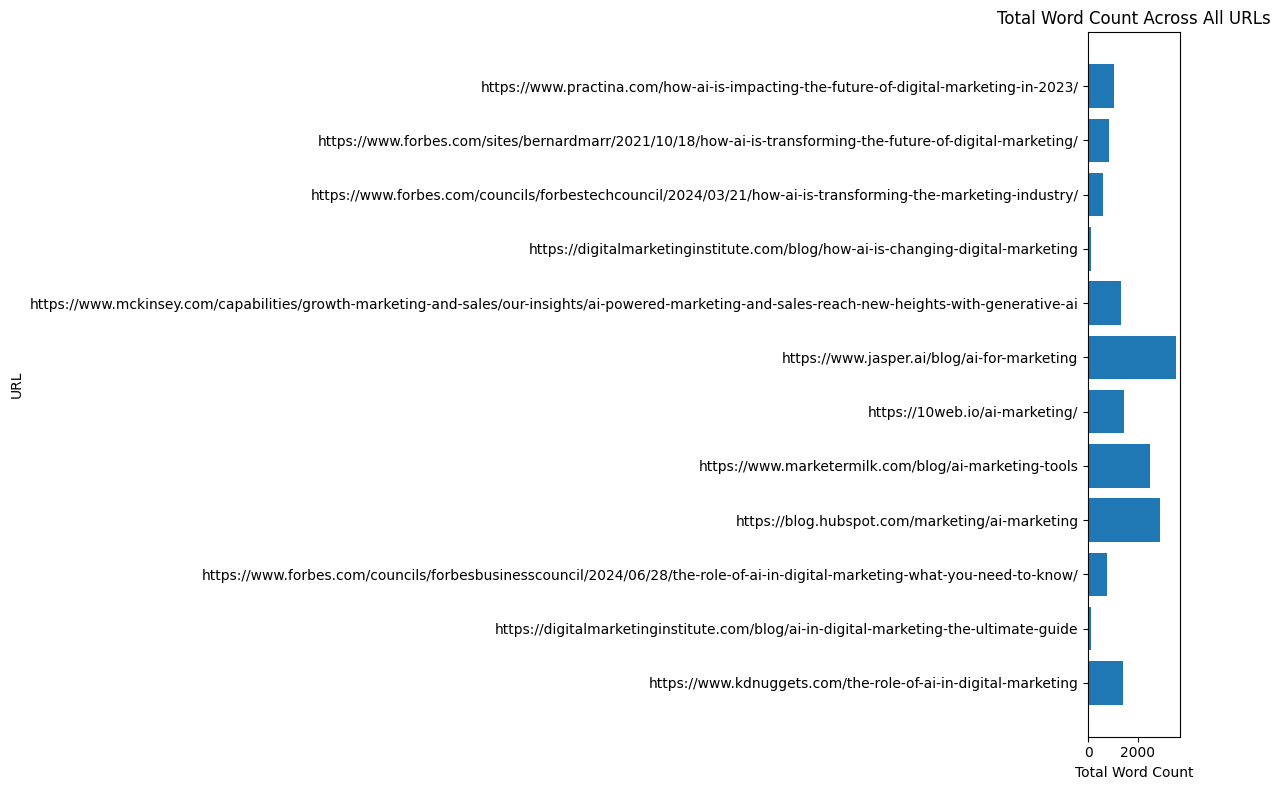

In [8]:
import matplotlib.pyplot as plt

# Plotting the Total Words count for each URL
plt.figure(figsize=(12, 8))
plt.barh(merged_df['URL'], merged_df['Total Words'])
plt.xlabel('Total Word Count')
plt.ylabel('URL')
plt.title('Total Word Count Across All URLs')
plt.tight_layout()
plt.show()


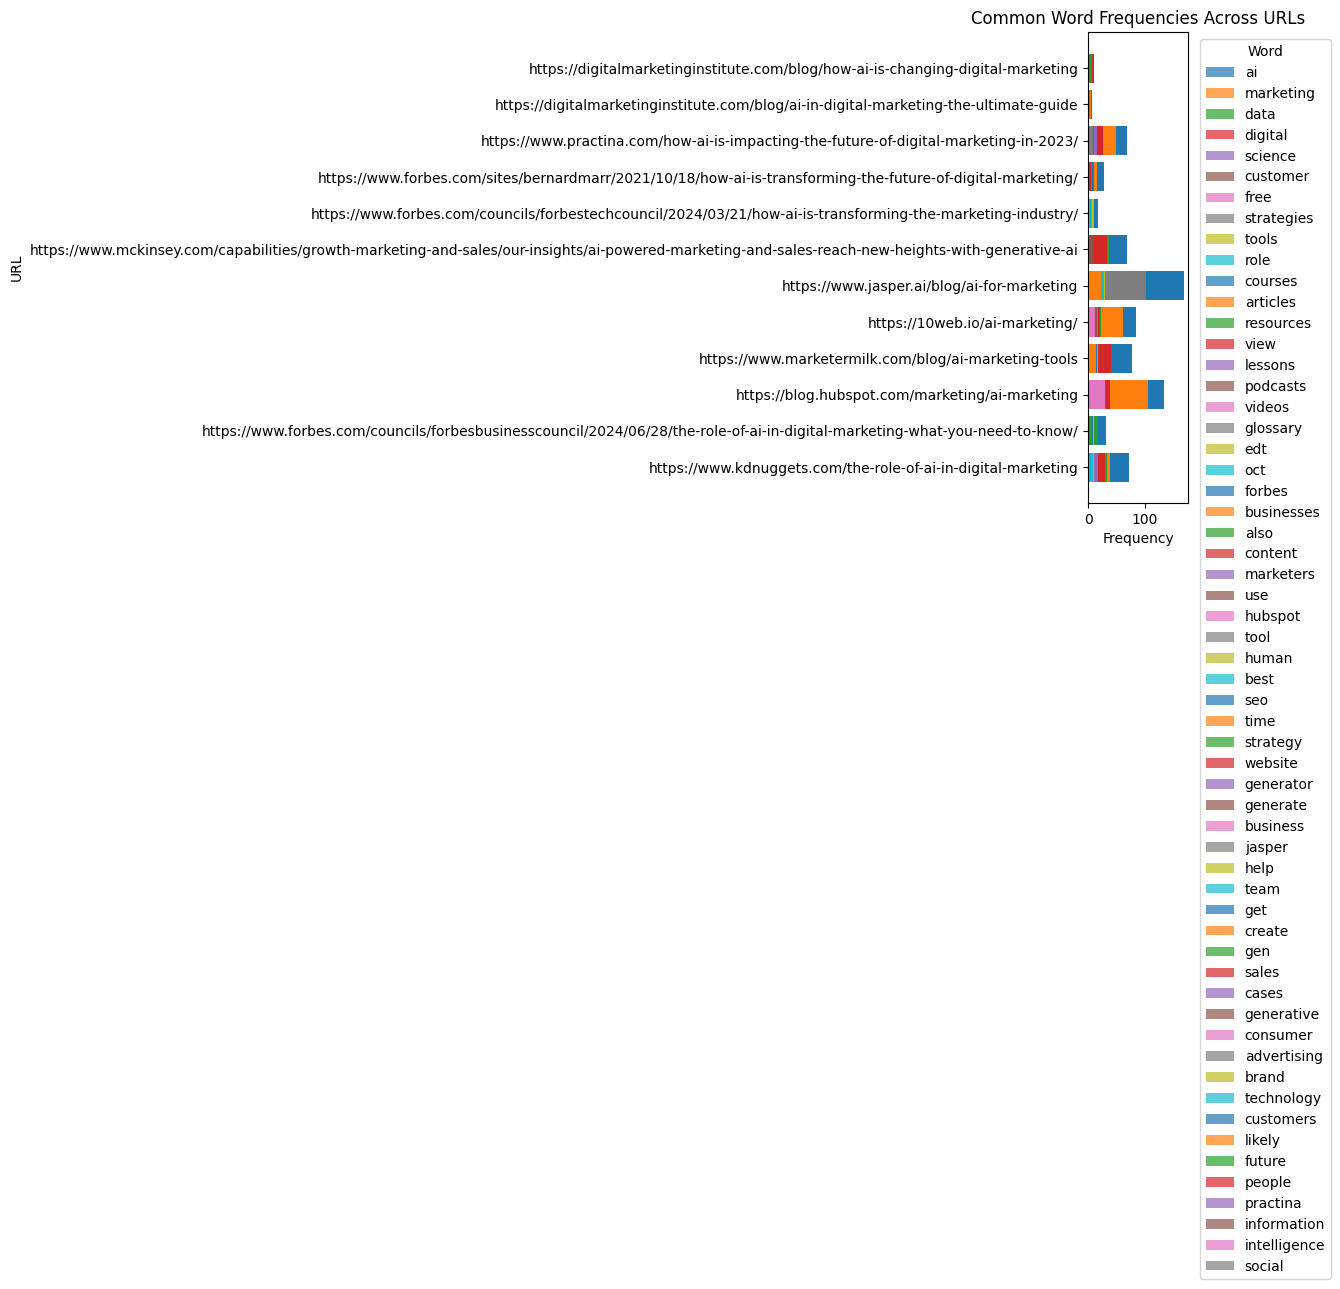

In [9]:


# Merging the summary statistics (total sentences and words) with the common words dataframe
merged_df = summary_df.merge(common_words_df, on='URL', how='left')

# Extracting a subset of the merged dataframe for common words comparison
common_words_columns = [col for col in merged_df.columns if col not in ['URL', 'Total Sentences', 'Total Words']]
common_words_data = merged_df.melt(id_vars=['URL'], value_vars=common_words_columns, var_name='Word', value_name='Frequency')

# Removing NaN values for easier plotting
common_words_data.dropna(inplace=True)

# Plotting common word frequencies across URLs
plt.figure(figsize=(14, 10))

# Using a bar plot to visualize frequencies of common words across different URLs
for word in common_words_columns:
    if word in common_words_data['Word'].unique():
        word_data = common_words_data[common_words_data['Word'] == word]
        plt.barh(word_data['URL'], word_data['Frequency'], label=word, alpha=0.7)

plt.xlabel('Frequency')
plt.ylabel('URL')
plt.title('Common Word Frequencies Across URLs')
plt.legend(title='Word', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


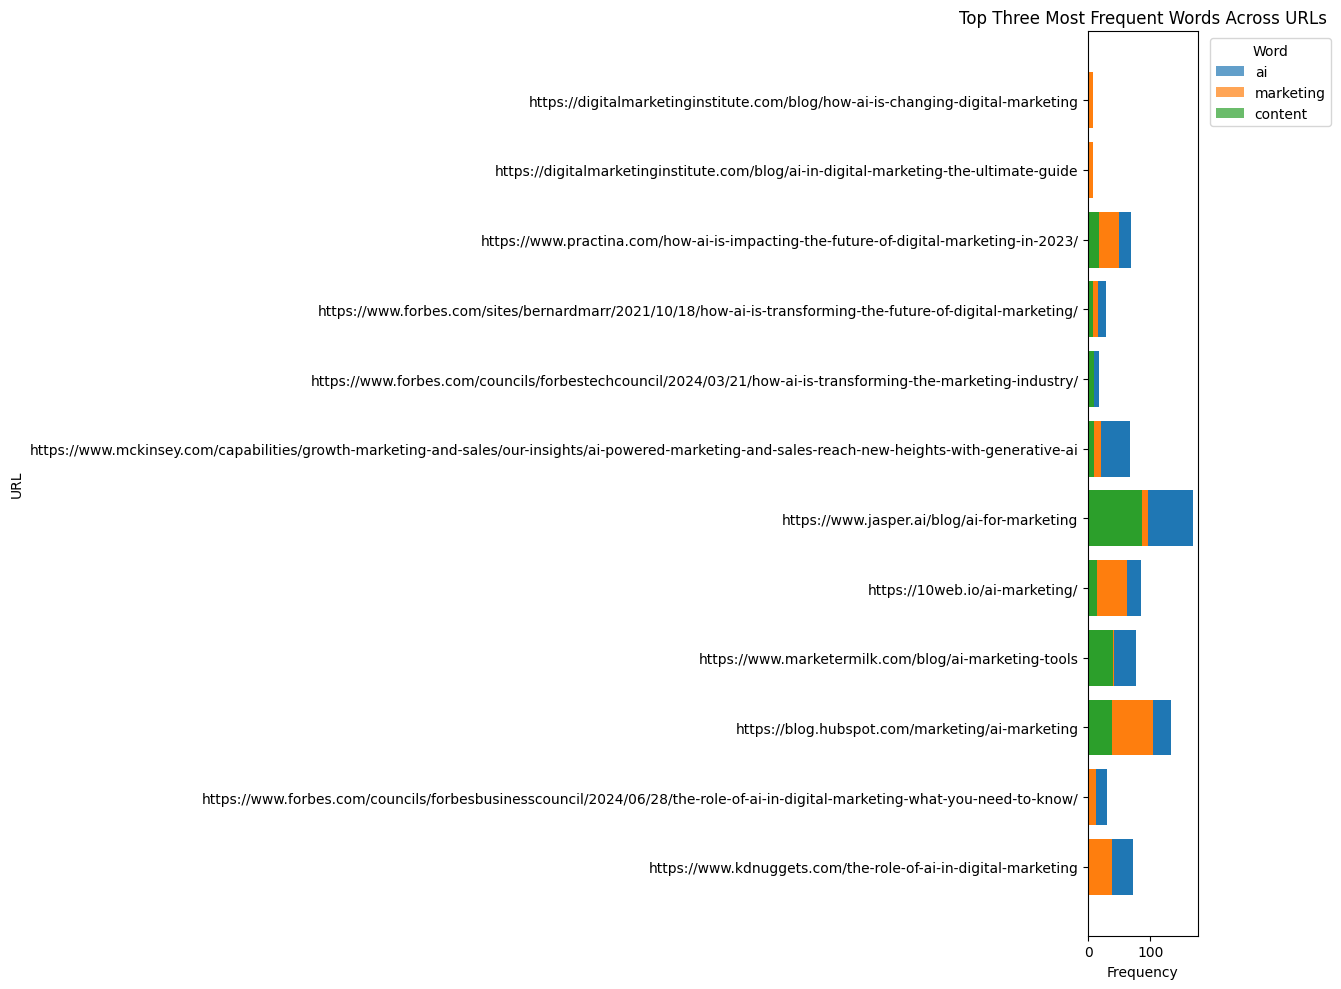

In [10]:
# Calculating the total frequency of each word across all URLs
total_word_frequency = common_words_data.groupby('Word')['Frequency'].sum().reset_index()

# Sorting the words by frequency to find the top three
top_three_words = total_word_frequency.sort_values(by='Frequency', ascending=False).head(3)

# Filtering the data to only include the top three words
top_three_data = common_words_data[common_words_data['Word'].isin(top_three_words['Word'])]

# Plotting the frequencies of the top three most frequent words across URLs
plt.figure(figsize=(14, 10))

for word in top_three_words['Word']:
    word_data = top_three_data[top_three_data['Word'] == word]
    plt.barh(word_data['URL'], word_data['Frequency'], label=word, alpha=0.7)

plt.xlabel('Frequency')
plt.ylabel('URL')
plt.title('Top Three Most Frequent Words Across URLs')
plt.legend(title='Word', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
